<a href="https://colab.research.google.com/github/Marcelo-S-Pereira/data_exp/blob/main/Classificando_m%C3%BAsicas_do_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
import pandas as pd

In [2]:
#2
pd.set_option('display.max_columns',None)
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
#3
df.shape

(114000, 21)

#Criando a variável de target

De acordo com a regra de negócio, a coluna "valence" é uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimidas, irritada). Para criar a nossa coluna alvo no modelo preditivo, vamos utilizar a coluna "valence" para ser nosso critério de músicas mais agitadas ou lentas.




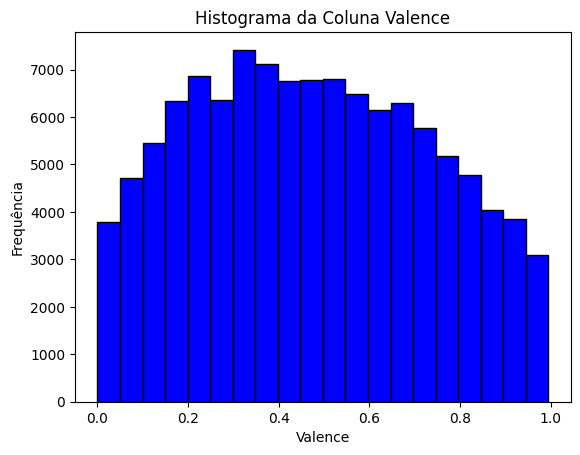

In [4]:
#4
import matplotlib.pyplot as plt

#5
# analisando a coluna "valence" para criar a nossa target
plt.hist(df['valence'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna Valence')
plt.show()

In [5]:
#6
df['valence'].describe()


,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


In [6]:
#7
def categorizar_valence(row):
  if row['valence'] > 0.5:
    return 'agitada'
  else:
    return 'lenta'

    # Crie a nova coluna "target" usando a função categorizer_valence

df['target'] = df.apply(categorizar_valence, axis=1)

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


In [7]:
#8
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music,lenta
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music,lenta
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music,agitada
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music,lenta
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music,agitada


#A análise exploratória está concluída e foi determinada a coluna com os critérios esperados.

Feature engineering

Como próximo passo vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas



In [8]:
9#
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [9]:
#10
df_musica = df.drop(['Unnamed: 0', 'track_id'], axis = 1)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


#Tratado os dados categóricos


LabelEncoder: Essa classe é utilizada para condificar rótulos de classes em números inteiros. É frequentemente usado quando se tabalha com algorítimos de aprendizado que requerem rótulos numéricos. Biblioteca Scikit-learn

One-hot Encoder: Cria uma matriz, estender os dados, e insere uma informação binária.




In [10]:
#11
def label_encoder_dataframe(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for column in columns_to_encode:
    if column in df.columns:
      df[column] = le.fit_transform(df[column])
    else:
      print('A lista possui colunas que não existem no dataframe.')

  return df

colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


Cada artista possui seu código numérico, e assim todas as colunas texto foram codificadas para número de modo que o critério é exclusivo. Isto por que não é possível gerar modelos de machine learn com textos.

#Analisando as variáveis que vão compor nosso modelo



In [11]:
12#
import seaborn as sns



<Axes: >

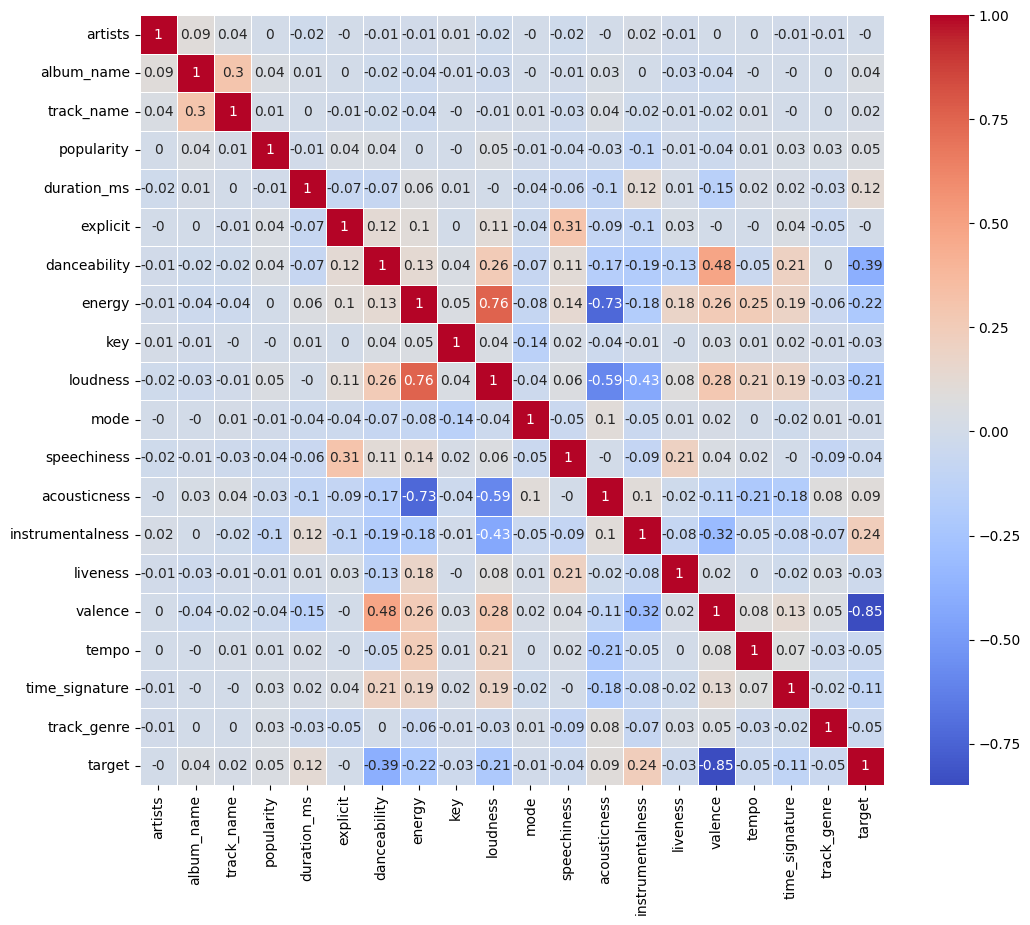

In [12]:
#13
correlation_matrix = df_musica.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

A matriz mostra que músicas com alta energia tendem a ser mais altas e dançantes, enquanto músicas acústicas tendem a ser mais calmas e menos dançantes. A positividade de uma música geralmente se relaciona com sua dançabilidade. Outras variáveis, como a presença de fala ou instrumentos, têm relações mais fracas entre si e com as demais. Basicamente, a matriz ajuda a entender como diferentes características musicais se relacionam.

#Entendendo o equilíbrio do target


In [13]:
#14
# verificando o equilíbrio das classes
round(df_musica['target'].value_counts(normalize = True)*100,2)

,proportion
target,
1,54.37
0,45.63


Separando os dados em treino e teste

In [14]:
#15
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [15]:
#16
set(df['target'])

{'agitada', 'lenta'}

In [16]:
#17
set(df_musica['target'])

{0, 1}

#Separando os dados em treino e teste

In [17]:
#18
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [18]:
#19
#separando os dados em treino e teste (método hold out)

from sklearn.model_selection import train_test_split

#20
#X = df_musica.drop('target', axis=1)
x = df_musica[['popularity','duration_ms','danceability','energy','loudness','acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state=7)

In [19]:
#21
print(x_train.shape, x_test.shape)

(91200, 9) (22800, 9)


Normalizando os dados
Ao aplicar o MinMaxScaler, todos os valores dos dados serão transformados para o intervalo entre 0 e 1, onde o valor mínimo será 0 e o valor máximo será 1. Essa técnica é especialmente útil quando os algoritmos de aprendizado de máquina são sensíveis à escala dos dados.

Por que aplicamos a normalização dos dados com as bases já separadas em treino e teste? Se aplicarmos normalizações antes de dividir em conjuntos de treino e teste, podemos acabar introduzindo informações do conjunto de teste no conjunto de treino. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de Data Leak (vazamento de dados).

In [20]:
#22
from sklearn.preprocessing import MinMaxScaler

#23
#Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train) # data leak, evitar vazamento de dados estatísticos para a base de teste, e manter na base de treino

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

Criando uma função para executar modelos de machine learning
Vamos criar uma função que vai executar o modelo preditivo e avaliar a sua performance utilizando as principais métricas de validação.

In [21]:
#24
def roda_modelo(modelo):

  from sklearn.metrics import roc_curve, roc_auc_score, classification_report


  #Treinando modelo com os dados de treino
  modelo.fit(x_train_escalonado, y_train)

  # Calculando a probabilidade e calculando o Auc
  prob_predic = modelo.predict_proba(x_test_escalonado)#obtem as probabilidades associadas as classes previstas para cada instância de dados

  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f"AUC {auc}")

  #Fazendo a predição dos dados de teste e calculando o classification report
  predicao = modelo.predict(x_test_escalonado)
  print("\nClassification Report")
  print(classification_report(y_test, predicao))

  print("\nRoc Curve\n")
  #Fazer previsões de probabilidades
  y_pred_probs = modelo.predict_proba(x_test_escalonado)[:,1]

  #Calcular a curva ROC
  fpr, tpr, threshholds = roc_curve(y_test, y_pred_probs)

  #Calcular a AUC (área sob a curva ROC)
  auc = roc_auc_score(y_test, y_pred_probs)

  #Plotar a curva RoC
  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:,.2f}') # linewidth
  plt.plot([0,1], [0,1], color='gray', linestyle='--')
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend()
  plt.show()

  #Converter probabilidades em classes preditas (0 ou 1)
  y_pred = (y_pred_probs > 0.5).astype(int)



#Regressão logística


O modelo se baseia em uma função logística, que transforma as variáveis independentes em uma probabilidade entre 0 e 1. Para novas entradas de dados, o modelo calcula a probabilidade do evento binário ocorrer.

AUC 0.7962019382303666

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



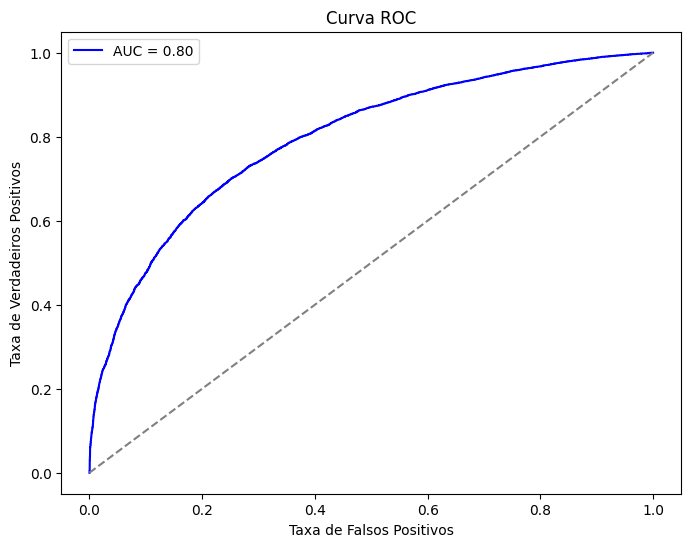

In [22]:
#25
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

#KNN (K-Nearest Neighbors)

Para um novo ponto de dados, o KNN identifica os K pontos mais próximos (vizinhos) no conjunto de treinamento. A classe do novo ponto é a classe mais frequente entre os K vizinhos.

AUC 0.8117874424738845

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10403
           1       0.77      0.78      0.78     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



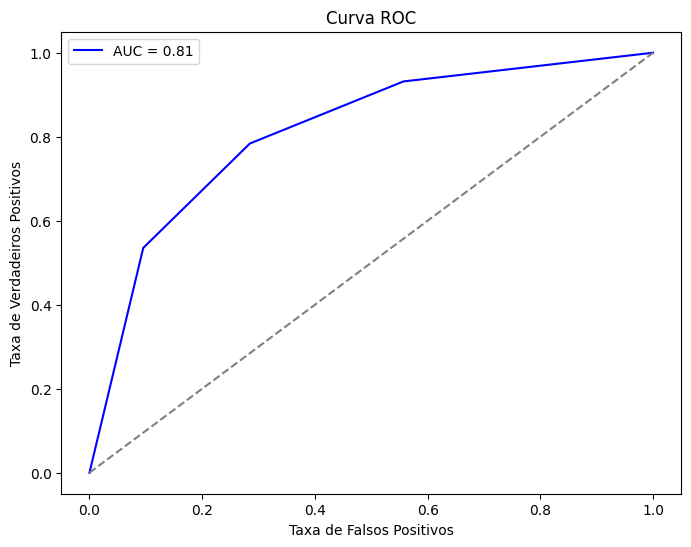

In [23]:
#26
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)


#Random Florest


O Random Forest Classifier é um algoritmo de ensemble learning, que combina vários modelos para melhorar a performance. O modelo cria uma floresta de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório dos dados (bootstrap). A classe final do novo ponto de dados é a classe mais votada pelas árvores da floresta.

AUC 0.8289011713173282

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     10403
           1       0.77      0.77      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



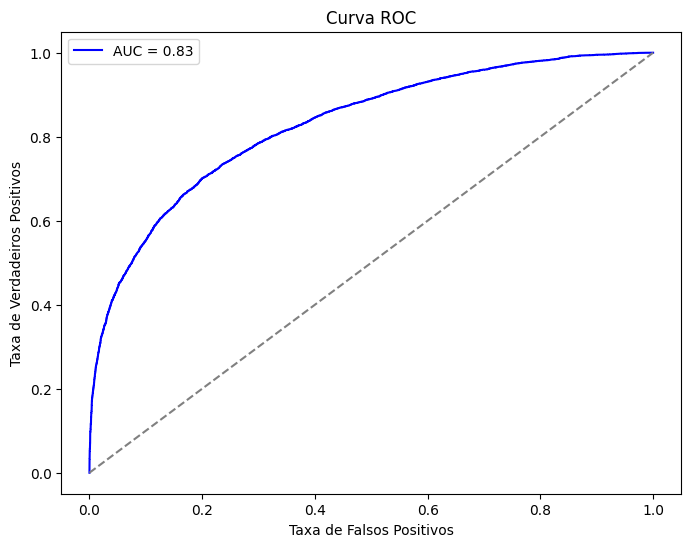

In [24]:
#27
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7,n_estimators=100)
roda_modelo(modelo_random_forest)

#Testando novos parâmetros com Grid Search

Esse teste pode demorar um pouquinho!


In [25]:
#28
from sklearn.model_selection import GridSearchCV

#29
# Defina os parâmetros a serem testados

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [5,10,15]
}

#30
# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

#31
# Ajuste o modelo ao conjunto de dados
grid_search.fit(x_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiper parâmetros:", rf_params)


Melhores hiper parâmetros: {'max_depth': 15, 'n_estimators': 300}


Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 300}

Testando com os melhores parametros encontrados.

AUC 0.9063075396365543

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10403
           1       0.84      0.84      0.84     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



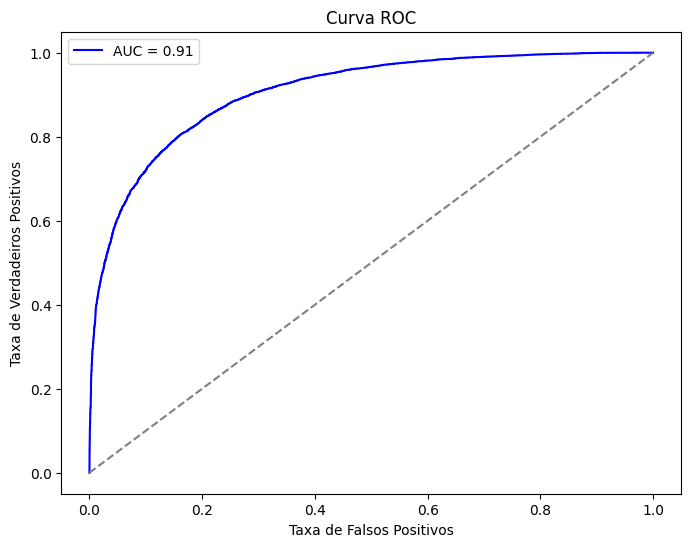

In [26]:
#32
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators= 300)
roda_modelo(modelo_random_forest_gs)

Testando o modelo

In [27]:
#33
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#34
#Criando o pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

#35
#realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

#36
#obtendo o predict
def mapear_valor(valores):
     resultados = []
     for valor in valores:
        if valor == 0:
          resultados.append('Música agitada')
        elif valor == 1:
          resultados.append('Música lenta')
        else:
          resultados.append('Desconhecido')
     return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()


,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta
